<a href="https://colab.research.google.com/github/Faig22/house_prices_prediction/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-bright')

## Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile

with ZipFile("drive/MyDrive/house-prices-advanced-regression-techniques.zip") as myzip:
    submission = myzip.open("sample_submission.csv")
    train = myzip.open("train.csv")
    test = myzip.open("test.csv")
    info = myzip.open("data_description.txt")

# data_description = pd.read_table(info, header = None)
sample_submission = pd.read_csv(submission)
train_data = pd.read_csv(train)
test_data = pd.read_csv(test)

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(f"train data shape:{train_data.shape}")
print(f"test data shape:{test_data.shape}")

train data shape:(1460, 81)
test data shape:(1459, 80)


## EDA

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Смотрим на наличие пропусков в тренировочных и тестовых данных

In [7]:
missing_train = (train_data.isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_train

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [8]:
missing_test = (test_data.isnull().sum() / test_data.shape[0] * 100).sort_values(ascending=False)
missing_test = missing_test[missing_test > 0]
missing_test

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
BsmtFullBath     0.137080
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
TotalBsmtSF      0.068540
Exterior2nd      0.068540
GarageCars       0.068540
Exterior1st      0.068540
GarageArea       0.068540
SaleType         0.068540
dtype: float64

Посмотрим на данные с большим кол-вом пропусков

<Figure size 432x288 with 0 Axes>

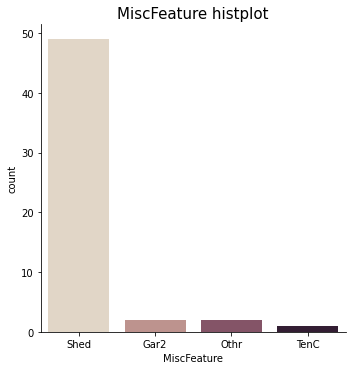

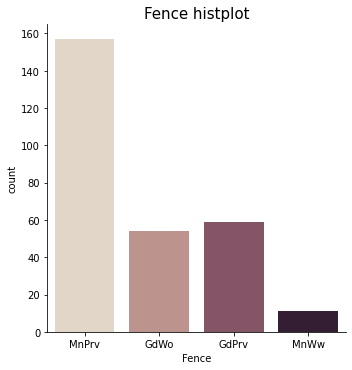

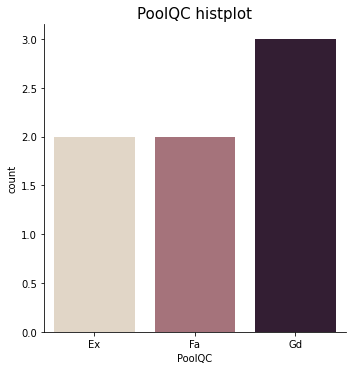

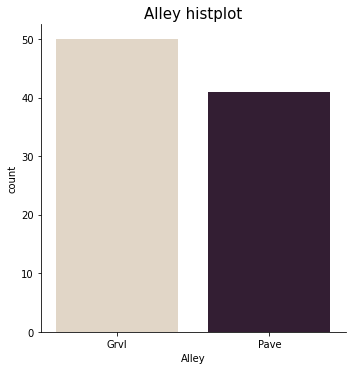

In [9]:
for i, col in enumerate(["MiscFeature", "Fence", "PoolQC", "Alley"]):
  plt.figure(i)
  sns.catplot(x= col, kind="count", palette="ch:.25", data=train_data);
  plt.title(col + ' histplot', fontsize=15);

Столбцы MiscFeature, Fence, PoolQC, Alley уберем из-за огромного кол-ва пропусков в данных

In [10]:
train_data = train_data.drop(columns = ["MiscFeature", "Fence", "PoolQC", "Alley", "Id"])
test_data = test_data.drop(columns = ["MiscFeature", "Fence", "PoolQC", "Alley"])

In [11]:
target = train_data['SalePrice']
train_data = train_data.drop(columns = ["SalePrice"])

In [12]:
train_data.describe(include = ["int", "float"])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Среди числовых признаков есть категориальные. Например MSSubClass.

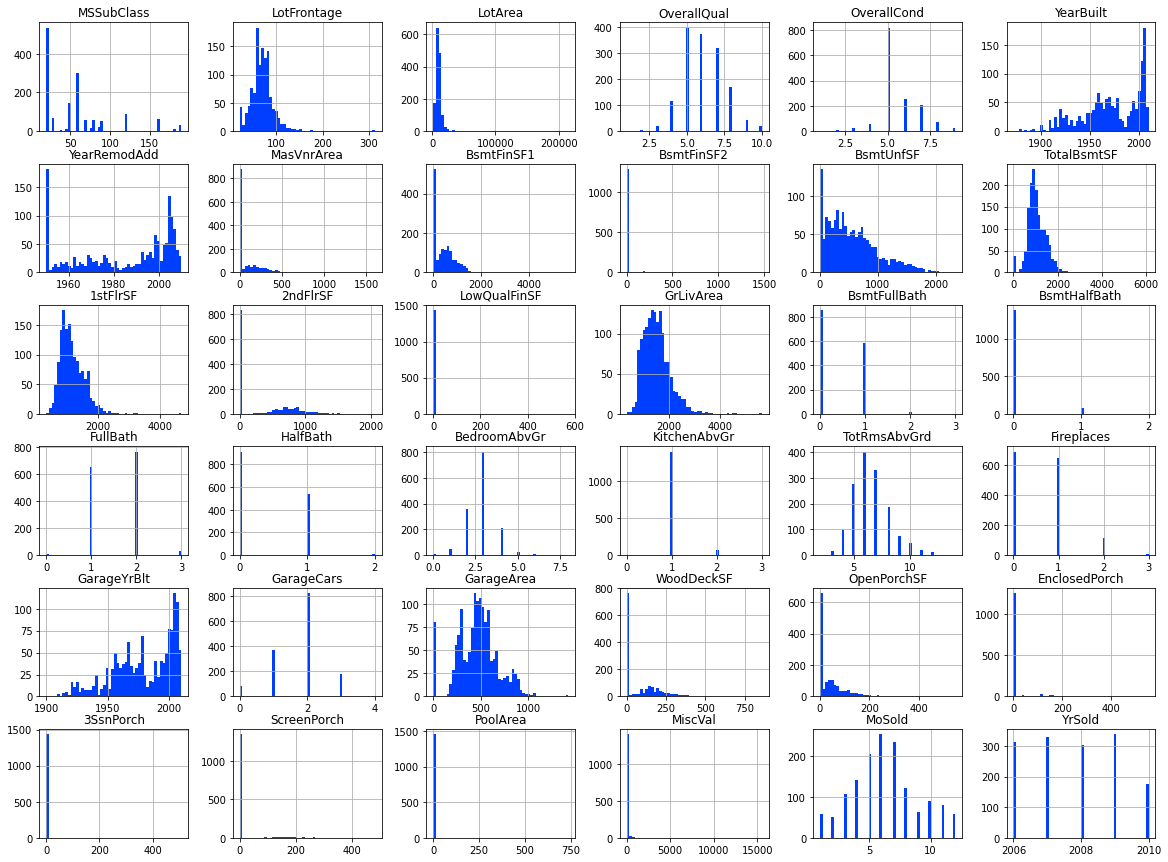

In [13]:
train_data.hist(bins = 50, figsize = (20, 15)); 

Выпишем те числовые признаки, которые принимают дискретные значения. Их трансформируем в категориальные

In [14]:
col_to_obj = ["MSSubClass", "OverallQual", "OverallCond", "BsmtFullBath",
              "FullBath", "HalfBath", "BedroomAbvGr", "Fireplaces", "GarageCars",
              "YrSold", "BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath", "KitchenAbvGr",
              "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "TotRmsAbvGrd", "MoSold"]

In [15]:
for col in col_to_obj:
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str) 


Отделим категориальные и числовые признаки

In [16]:
quantitative = []
qualitative = []

for i in train_data.columns:
    if train_data.dtypes[i] != 'object':
        quantitative.append(i)
    else:
        qualitative.append(i)

Проверим на всякий случай

In [17]:
print(f'{train_data.shape[1]} == {len(qualitative) + len(quantitative)}')

75 == 75


In [18]:
missing_quali = train_data[qualitative].isnull().sum().sort_values(ascending=False)
missing_quali = missing_quali[missing_quali > 0]
missing_quali

FireplaceQu     690
GarageQual       81
GarageType       81
GarageFinish     81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtQual         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
dtype: int64

Первые 5 признаков в missing_quali имеют большое кол-во пропусков, поэтому заменим их на None. У остальных вставим моду.

In [19]:
missing_quali.index

Index(['FireplaceQu', 'GarageQual', 'GarageType', 'GarageFinish', 'GarageCond',
       'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
       'MasVnrType', 'Electrical'],
      dtype='object')

In [20]:
for col in missing_quali.index:
    if col in ['FireplaceQu',
                'GarageType',
                'GarageCond',
                'GarageQual',
                'GarageFinish',]:
        
        train_data[col] = train_data[col].fillna('None')
        test_data[col] = test_data[col].fillna('None')

        
    elif col in ['BsmtExposure',
                'BsmtCond',
                'BsmtQual',
                'BsmtFinType2',
                'BsmtFinType1',
                'MasVnrType',
                'Electrical']:
      
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
        test_data[col] = test_data[col].fillna(train_data[col].mode()[0])
    else:
        pass

In [21]:
missing_quali = train_data[qualitative].isnull().sum().sort_values(ascending=False)
missing_quali = missing_quali[missing_quali > 0]
missing_quali

Series([], dtype: int64)

Поработаем над пропусками числовых признаков (заменим на медианные значения)

In [22]:
missing_quant = (train_data[quantitative].isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False)
missing_quant = missing_quant[missing_quant > 0]
missing_quant

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [23]:
for col in missing_quant.index:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    test_data[col] = test_data[col].fillna(train_data[col].median())


In [24]:
missing_quant = (train_data[quantitative].isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False)
missing_quant = missing_quant[missing_quant > 0]
missing_quant

Series([], dtype: float64)

In [25]:
print(f'train data nan values: {train_data.isnull().sum().sum()}')
print(f'test data nan values: {test_data.isnull().sum().sum()}')
print(f'train data shape:{train_data.shape}')

train data nan values: 0
test data nan values: 16
train data shape:(1460, 75)


В тестовых данных есть пропуски, которых нет в тренировочных данных. Посмотрим на них отдельно.

In [26]:
missing_quant_test = (test_data[quantitative].isnull().sum() / test_data.shape[0] * 100).sort_values(ascending=False)
missing_quant_test = missing_quant_test[missing_quant_test > 0]
missing_quant_test

BsmtFinSF1     0.06854
BsmtUnfSF      0.06854
TotalBsmtSF    0.06854
GarageArea     0.06854
dtype: float64

In [27]:
for col in missing_quant_test.index:
    test_data[col] = test_data[col].fillna(train_data[col].median())

In [28]:
print(f'test data nan values: {test_data.isnull().sum().sum()}')

test data nan values: 12


Теперь взглянем на категориальные признаки

In [29]:
missing_quali_test = test_data[qualitative].isnull().sum().sort_values(ascending=False)
missing_quali_test = missing_quali_test[missing_quali_test > 0]
missing_quali_test

MSZoning       4
Utilities      2
Functional     2
Exterior1st    1
SaleType       1
KitchenQual    1
Exterior2nd    1
dtype: int64

In [30]:
for col in missing_quali_test.index:
    test_data[col] = test_data[col].fillna(train_data[col].mode()[0])
  

In [31]:
print(f'test data nan values: {test_data.isnull().sum().sum()}')

test data nan values: 0


Закодируем категориальные признаки с помощью метода **get_dummies**

In [32]:
train_data = pd.get_dummies(data=train_data, drop_first=True)
test_data = pd.get_dummies(data=test_data, drop_first=True)


In [33]:
print(f'train data shape:{train_data.shape}')
print(f'test data shape:{test_data.shape}')


train data shape:(1460, 592)
test data shape:(1459, 587)


In [34]:
train_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinSF2_1029,BsmtFinSF2_1031,BsmtFinSF2_105,BsmtFinSF2_1057,BsmtFinSF2_106,BsmtFinSF2_1061,BsmtFinSF2_1063,BsmtFinSF2_108,BsmtFinSF2_1080,BsmtFinSF2_1085,BsmtFinSF2_110,BsmtFinSF2_1120,BsmtFinSF2_1127,BsmtFinSF2_117,BsmtFinSF2_119,BsmtFinSF2_121,BsmtFinSF2_123,BsmtFinSF2_125,BsmtFinSF2_127,BsmtFinSF2_128,BsmtFinSF2_132,BsmtFinSF2_139,BsmtFinSF2_144,BsmtFinSF2_147,BsmtFinSF2_1474,BsmtFinSF2_149,BsmtFinSF2_150,BsmtFinSF2_163,BsmtFinSF2_165,BsmtFinSF2_168,BsmtFinSF2_169,BsmtFinSF2_173,BsmtFinSF2_174,BsmtFinSF2_175,BsmtFinSF2_177,BsmtFinSF2_180,BsmtFinSF2_181,BsmtFinSF2_182,BsmtFinSF2_184,BsmtFinSF2_193,BsmtFinSF2_202,BsmtFinSF2_208,BsmtFinSF2_210,BsmtFinSF2_211,BsmtFinSF2_215,BsmtFinSF2_219,BsmtFinSF2_228,BsmtFinSF2_230,BsmtFinSF2_232,BsmtFinSF2_239,BsmtFinSF2_240,BsmtFinSF2_258,BsmtFinSF2_264,BsmtFinSF2_273,BsmtFinSF2_276,BsmtFinSF2_279,BsmtFinSF2_28,BsmtFinSF2_287,BsmtFinSF2_290,BsmtFinSF2_294,BsmtFinSF2_306,B

## Feature Selection

In [36]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 37.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [37]:
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures, DropCorrelatedFeatures, RecursiveFeatureElimination

Удалим признаки, которые заполнены константами.

In [38]:
sel = DropConstantFeatures(tol=0.99, variables=None)

sel.fit(train_data)

features_to_drop = sel.features_to_drop_

sel.features_to_drop_

['MSSubClass_180',
 'MSSubClass_40',
 'MSSubClass_45',
 'Street_Pave',
 'LotShape_IR3',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_NPkVill',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'OverallQual_2',
 'OverallCond_2',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Exterior2nd_Stone',
 'ExterQual_Fa',
 'ExterCond_Po',
 'F

In [39]:
train_data.drop(features_to_drop, axis=1, inplace=True)
# test_data.drop(features_to_drop, axis=1, inplace=True)

Найдем дупликаты.

In [40]:
sel = DropDuplicateFeatures(variables=None)

sel.fit(train_data)

features_to_drop = sel.features_to_drop_

sel.features_to_drop_

{'BldgType_Duplex', 'GarageCond_None', 'GarageFinish_None', 'GarageQual_None'}

In [41]:
train_data.drop(features_to_drop, axis=1, inplace=True)
# test_data.drop(features_to_drop, axis=1, inplace=True)

Удалим скореллированные данные (от 0.75 и выше)

In [42]:
sel = DropCorrelatedFeatures(threshold=0.75, method='pearson') 

sel.fit(train_data)

features_to_drop = sel.features_to_drop_

print('Features to drop', sel.features_to_drop_)
print()
print(f'Корреляция между: {sel.correlated_feature_sets_}')

Features to drop {'BldgType_2fmCon', 'Exterior2nd_MetalSd', 'ExterCond_TA', 'FullBath_2', 'SaleType_WD', 'BsmtQual_TA', 'GarageCond_TA', 'Exterior2nd_Plywood', 'KitchenAbvGr_2', 'SaleCondition_Partial', 'GarageYrBlt', '1stFlrSF', 'HouseStyle_SLvl', 'HouseStyle_2Story', 'Exterior2nd_Stucco', 'MSZoning_RM', 'KitchenQual_TA', 'ExterQual_TA', 'RoofStyle_Hip', 'FireplaceQu_None', 'Exterior2nd_VinylSd', 'HouseStyle_1Story', 'Exterior2nd_CmentBd', 'Neighborhood_Somerst', 'MasVnrType_None', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'Foundation_PConc'}

Корреляция между: [{'YearBuilt', 'GarageYrBlt'}, {'1stFlrSF', 'TotalBsmtSF'}, {'HouseStyle_2Story', '2ndFlrSF', 'HouseStyle_1Story'}, {'MSSubClass_190', 'BldgType_2fmCon'}, {'HouseStyle_SLvl', 'MSSubClass_80'}, {'MSZoning_FV', 'Neighborhood_Somerst'}, {'MSZoning_RM', 'MSZoning_RL'}, {'RoofStyle_Gable', 'RoofStyle_Hip'}, {'Exterior2nd_CmentBd', 'Exterior1st_CemntBd'}, {'Exterior2nd_HdBoard', 'Exterior1st_HdBoard'}, {'Exterior1st_MetalSd', 'Ex

In [43]:
train_data.drop(features_to_drop, axis=1, inplace=True)
# test_data.drop(features_to_drop, axis=1, inplace=True)

In [44]:
print(f'train data shape:{train_data.shape}')

train data shape:(1460, 189)


Recursive Feature Elimination

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Выберем модель градиентного бустинга для задач регрессии
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# Настроим RFE

sel = RecursiveFeatureElimination(
    variables=None, 
    estimator = model, 
    scoring = 'r2',
    threshold = 0.001,
    cv=5
)



sel.fit(train_data, target)

RecursiveFeatureElimination(cv=5,
                            estimator=GradientBoostingRegressor(max_depth=4,
                                                                n_estimators=10,
                                                                random_state=10),
                            scoring='r2', threshold=0.001)

Посмотрим на влияние каждого признака на таргет

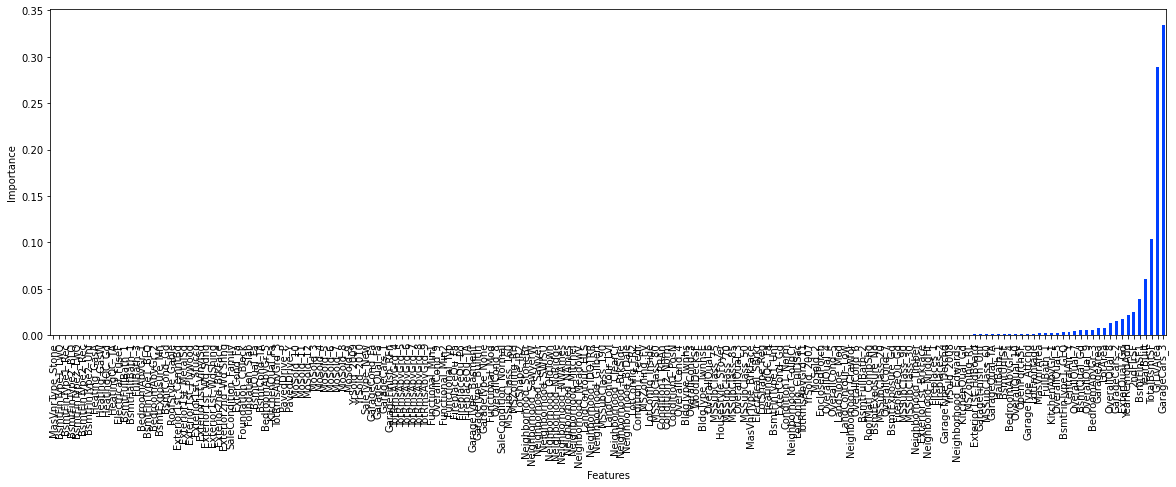

In [46]:
sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [47]:
features_to_drop = sel.features_to_drop_
sel.features_to_drop_

['MasVnrArea',
 'BsmtUnfSF',
 'MSSubClass_60',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SawyerW',
 'OverallQual_10',
 'RoofStyle_Gable',
 'Exterior1st_BrkFace',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'MasVnrType_BrkFace',
 'MasVnrType_Stone',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'BsmtQual_Gd',
 'BsmtCond_TA',
 'BsmtFinType1_BLQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Unf',
 'HeatingQC_Gd',
 'Electrical_FuseF',
 'BsmtFullBath_1',
 'FullBath_3',
 'BedroomAbvGr_1',
 'KitchenAbvGr_1',
 'GarageType_None']

In [48]:
train_data.drop(features_to_drop, axis=1, inplace=True)

In [49]:
print(f'train data shape:{train_data.shape}')
print(f'test data shape:{test_data.shape}')
print(f"train & test = {len((test_data.columns & train_data.columns))}")

train data shape:(1460, 161)
test data shape:(1459, 587)
train & test = 153


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Найдем длину пересечения списка признаков в тесте и в трейне. В трейне всего 161 признак, в тесте - 587 (после обработки категориальных признаков). Длина пересечения составляет 153 признака. Оставим их в трейне и в тесте.

In [50]:
features_in = (test_data.columns & train_data.columns)
X_train = train_data[features_in]
X_test = test_data[features_in]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


## Feature Transformation

Оценим асимметрию данных количественно при помощи метода skew из библиотеки scipy

In [51]:
skew_df = pd.DataFrame(X_train.columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: st.skew(X_train[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_transform = skew_df[skew_df['Absolute Skew'] >= 1]
skew_transform

,Feature,Skew,Absolute Skew
0,LotFrontage,2.406671,2.406671
1,LotArea,12.195142,12.195142
4,BsmtFinSF1,1.683771,1.683771
5,TotalBsmtSF,1.522688,1.522688
7,GrLivArea,1.365156,1.365156
9,WoodDeckSF,1.539792,1.539792
10,OpenPorchSF,2.361912,2.361912
11,EnclosedPorch,3.086696,3.086696
12,MSSubClass_160,4.496632,4.496632
13,MSSubClass_190,6.759264,6.759264


Посмотрим на распределение признака "LotArea" у которого skew больше 12. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


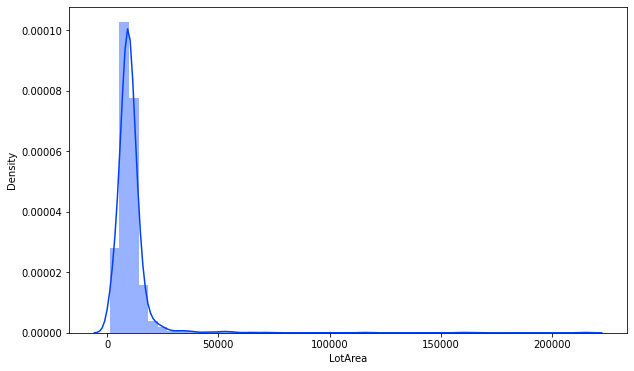

In [52]:
plt.figure(figsize=(10,6));
sns.distplot(X_train["LotArea"]);

Видно сильное смещение влево и также большой хвост справа. Прологарифмируем все признаки у которых skew больше 1

In [53]:
for val in skew_transform["Feature"].values:
    X_train[val] = np.log1p(X_train[val])
    X_test[val] = np.log1p(X_test[val])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
skew_df = pd.DataFrame(X_train.columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: st.skew(X_train[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df

,Feature,Skew,Absolute Skew
0,LotFrontage,-0.869112,0.869112
1,LotArea,-0.137263,0.137263
2,YearBuilt,-0.612831,0.612831
3,YearRemodAdd,-0.503044,0.503044
4,BsmtFinSF1,-0.617774,0.617774
5,TotalBsmtSF,-5.149373,5.149373
6,2ndFlrSF,0.812194,0.812194
7,GrLivArea,-0.006134,0.006134
8,GarageArea,0.179796,0.179796
9,WoodDeckSF,0.153379,0.153379


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


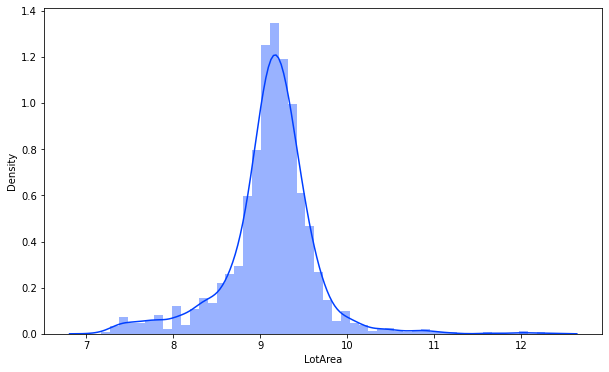

In [55]:
plt.figure(figsize=(10,6));
sns.distplot(X_train["LotArea"]);

Логарифмирование нормализовало данные. 

## Target Transformation

Изобразим распределение целевой переменной

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


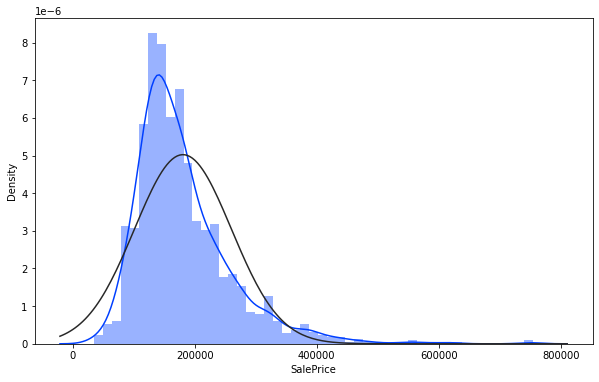

In [56]:
plt.figure(figsize=(10,6));
sns.distplot(target, fit=st.norm);

Цена не соответствует нормальному распределению, поэтому перед регрессией ее необходимо преобразовать.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


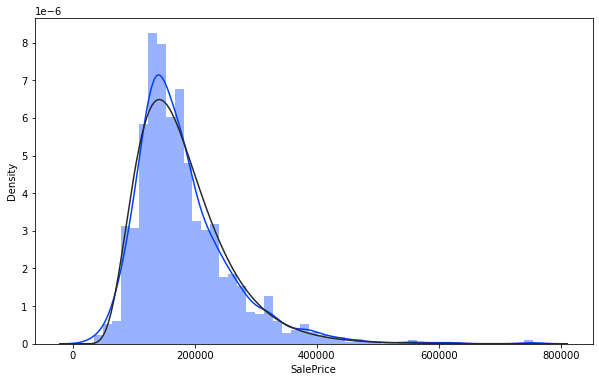

In [57]:
plt.figure(figsize=(10,6));
sns.distplot(target, fit=st.lognorm);

Лучше всего подходит логнормальное распределение

In [58]:
target_log = np.log1p(target)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


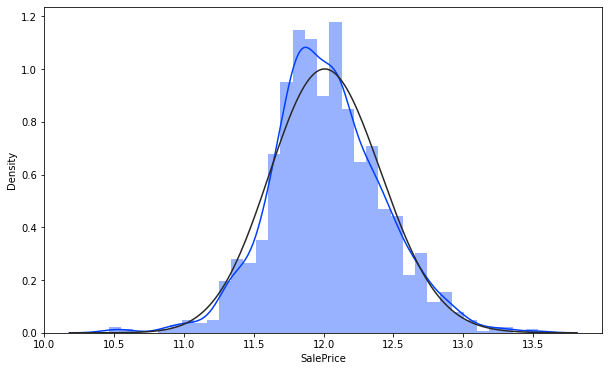

In [59]:
plt.figure(figsize=(10,6));
sns.distplot(target_log, fit=st.lognorm);

## Model Selection

In [60]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
# from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from tqdm import tqdm  

In [61]:
kfold = KFold(n_splits=10)
models = [SVR(), Lasso(), Ridge(), BayesianRidge(), GradientBoostingRegressor(),
        RandomForestRegressor(), ExtraTreesRegressor(), KNeighborsRegressor(), LGBMRegressor()]
models_df = pd.DataFrame(columns=["model","neg_mean_squared_error"])
for model in tqdm(models):
    reg = model
    reg.fit(X_train, target_log)
    
    models_df = models_df.append({'model': model,'neg_mean_squared_error': 
                                  cross_val_score(reg, X_train, target_log, scoring='neg_mean_squared_error', cv=kfold).mean()}, ignore_index=True)

100%|██████████| 9/9 [01:14<00:00,  8.28s/it]


In [62]:
models_df.sort_values(by=['neg_mean_squared_error'],ascending=False)

,model,neg_mean_squared_error
3,BayesianRidge(),-0.017311
2,Ridge(),-0.017445
4,([DecisionTreeRegressor(criterion='friedman_ms...,-0.017874
8,LGBMRegressor(),-0.018833
5,"(DecisionTreeRegressor(max_features='auto', ra...",-0.021506
6,"(ExtraTreeRegressor(random_state=77919317), Ex...",-0.023010
7,KNeighborsRegressor(),-0.062909
1,Lasso(),-0.063970
0,SVR(),-0.065837


In [ ]:
a = np.array([7,0.1,3])
b = np.log1p(a)
print(b)
a1 = np.exp(b)
print(a1-1)

[2.07944154 0.09531018 1.38629436]
[7.  0.1 3. ]


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters = {'learning_rate': [0.01, 0.02, 0.03, 0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [1000],
              'max_depth'    : [2,3,4]}


gbr = GradientBoostingRegressor()

grid_gbr = GridSearchCV(estimator=gbr, param_grid=parameters, cv=5, n_jobs=-1)
grid_gbr.fit(X_train, target_log)

print(grid_gbr.best_estimator_)
print(grid_gbr.best_score_)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=1000,
                          subsample=0.5)
0.8969716696317545


In [65]:
gbr = GradientBoostingRegressor(learning_rate=0.02, subsample=0.5, n_estimators=1000, max_depth=4)

gbr.fit(X_train, target_log)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=1000,
                          subsample=0.5)

In [66]:
y_pred_log = gbr.predict(X_test)
y_pred = np.exp(y_pred_log)
y_pred = y_pred - 1

In [67]:
X_test.isnull().sum().sum()

0

In [ ]:
# X_test = X_test.dropna()

In [ ]:
# sample_submission

In [68]:
submission = sample_submission.copy()
submission['SalePrice'] = y_pred

In [69]:
submission.to_csv('submission.csv', index=False)